## TensorFlow and Keras

In [1]:
import tensorflow as tf

2023-11-20 14:38:54.413824: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [3]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.preprocessing.image import load_img

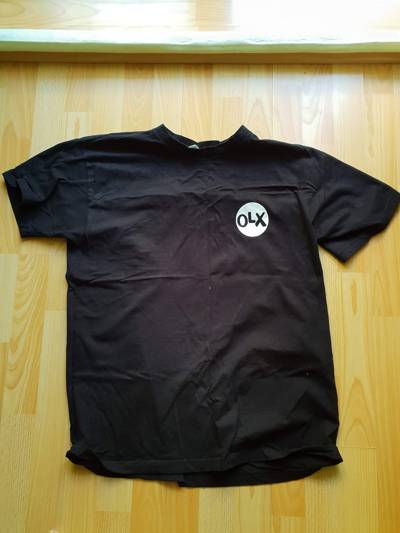

In [5]:
path = '../../clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299,299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [8]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## Pretained Convolutional Network Networks

* Imagenet dataset: https://image-net.org/ 
* Pre-trained model: https://keras.io/api/applications 

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
# get model from pretrain model "xception"
model = Xception(weights='imagenet', input_shape=(299,299,3))

2023-11-20 14:39:02.147599: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 14:39:02.161235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 14:39:02.161851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 14:39:02.162789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [11]:
# prepare input in array
# the xception model only accept array
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
# preprocess the input to be same with data when the xception model was train
X = preprocess_input(X)

In [14]:
# predict using pretrained model
pred = model.predict(X)

2023-11-20 14:39:06.157043: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-20 14:39:06.808544: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-20 14:39:06.809058: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-20 14:39:06.809094: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-20 14:39:06.809712: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-20 14:39:06.809802: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [15]:
#decode the class prediction generated from the model
# the result is pait of 'id', 'class', 'probability score'
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## Transfer Learning

* Reading data with ImageDataGenerator
* Train Xception

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# setup train generator with prepared preprocessing function
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [18]:
# generate training data automatically with tensorflow function help
train_ds = train_gen.flow_from_directory(
    '../../clothing-dataset-small/train', # path to train dir
    target_size=(150,150), # intended target size for training image
    batch_size=32 # amount of image per batch
)

Found 3068 images belonging to 10 classes.


In [19]:
#get next batch of train dataset
X, y = next(train_ds)

In [20]:
# check train ds shape
X.shape

(32, 150, 150, 3)

In [21]:
# show first 5 target label with one hot encoding
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
# generate val dataset
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_ds = val_gen.flow_from_directory(
    '../../clothing-dataset-small/validation',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [23]:
# get pretrained model from Xception, and we treat it as our base model
base_model = Xception(
    weights='imagenet',
    include_top=False, # only get base model and not include dense layer
    input_shape= (150,150,3)
)

# freeze the base model
# we only want to finetune the dense layer
base_model.trainable = False

#create input layer
inputs = keras.Input(shape=(150,150,3))

#apply input to base model
base = base_model(inputs, training=False)

#do pooling the output of applied base model with input, to vectorize output to 1 dimension
vectors = keras.layers.GlobalAveragePooling2D()(base)


#take the vector and applied with dense with 10 neuron as output
# 10 because we have 10 classes on our case
outputs = keras.layers.Dense(10)(vectors)

#create keras model with inputs and outputs
model = keras.Model(inputs, outputs)

In [24]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [25]:
preds.shape

(32, 10)

In [26]:
# show pred of first image
# showing that the output is random number as we havent train the model
preds[0]

array([-0.04457542,  0.09966946,  0.11340294, -0.39084083, -0.7515129 ,
       -0.7617215 ,  1.1623052 ,  0.26272014, -1.0197808 , -0.50383925],
      dtype=float32)

In [27]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 18s 165ms/step - loss: 1.1940 - accuracy: 0.6728 - val_loss: 0.8620 - val_accuracy: 0.7507
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 0.5590 - accuracy: 0.8243 - val_loss: 0.9015 - val_accuracy: 0.7654
Epoch 3/10
96/96 [==============================] - 12s 124ms/step - loss: 0.3947 - accuracy: 0.8680 - val_loss: 1.1036 - val_accuracy: 0.7478
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 0.2716 - accuracy: 0.9048 - val_loss: 1.0607 - val_accuracy: 0.7771
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1773 - accuracy: 0.9371 - val_loss: 0.9552 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0915 - accuracy: 0.9710 - val_loss: 0.7940 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0481 - accuracy: 0.9902 - val_loss: 0.7875 - val_accuracy: 0.8123

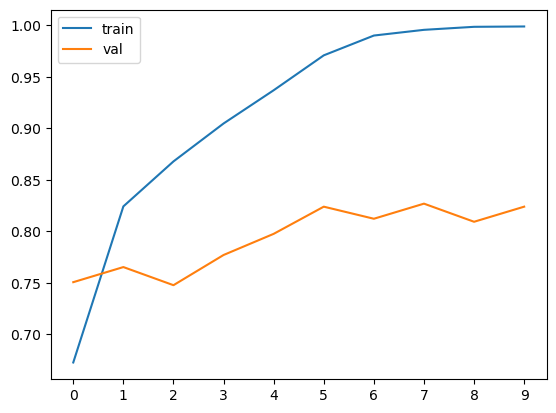

In [29]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

In [30]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False, 
        input_shape= (150,150,3)
    )

    base_model.trainable = False
    
    ########################################################

    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)


    outputs = keras.layers.Dense(10)(vectors)

    model = keras.Model(inputs, outputs)
    
    ########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy'])
    
    return model

In [31]:
scores = {}

for lr in [0.0001, 0.001,0.01,0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 13s 118ms/step - loss: 1.8972 - accuracy: 0.3761 - val_loss: 1.5520 - val_accuracy: 0.5425
Epoch 2/10
96/96 [==============================] - 10s 102ms/step - loss: 1.3714 - accuracy: 0.5825 - val_loss: 1.2167 - val_accuracy: 0.6481
Epoch 3/10
96/96 [==============================] - 10s 101ms/step - loss: 1.1297 - accuracy: 0.6486 - val_loss: 1.0440 - val_accuracy: 0.6891
Epoch 4/10
96/96 [==============================] - 10s 102ms/step - loss: 0.9924 - accuracy: 0.6884 - val_loss: 0.9372 - val_accuracy: 0.7243
Epoch 5/10
96/96 [==============================] - 10s 102ms/step - loss: 0.8994 - accuracy: 0.7154 - val_loss: 0.8724 - val_accuracy: 0.7361
Epoch 6/10
96/96 [==============================] - 10s 103ms/step - loss: 0.8318 - accuracy: 0.7327 - val_loss: 0.8202 - val_accuracy: 0.7595
Epoch 7/10
96/96 [==============================] - 10s 100ms/step - loss: 0.7808 - accuracy: 0.7464 - val_loss: 0.7839 - val_accuracy:

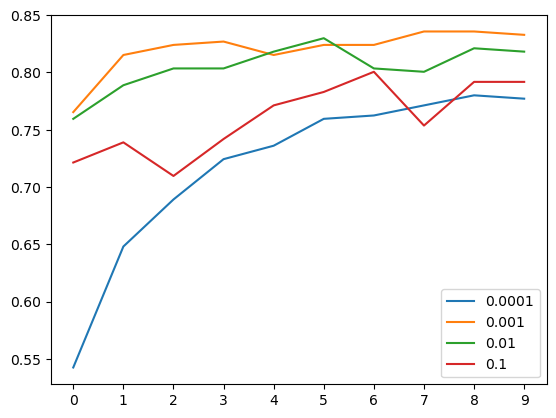

In [32]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

In [33]:
# keep 2 best learning rate model
del scores[0.1]
del scores[0.0001]

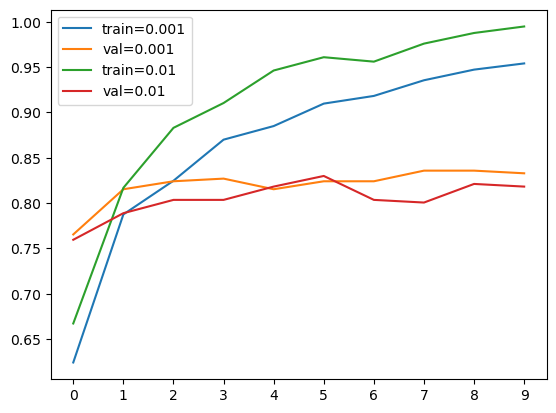

In [34]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [35]:
learning_rate = 0.001

## Checkpointing

In [36]:
checkpoint = keras.callbacks.ModelCheckpoint(
    './saved_model/xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5', #filename template
    save_best_only=True,
    monitor='val_accuracy', #parameter of monitor
    mode='max', # find max val accuracy
)


In [37]:
model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds,
    callbacks=[checkpoint] # set additional paramater "callback"
)

Epoch 1/10
96/96 [==============================] - 13s 112ms/step - loss: 1.0926 - accuracy: 0.6242 - val_loss: 0.7188 - val_accuracy: 0.7478
Epoch 2/10
96/96 [==============================] - 10s 104ms/step - loss: 0.6305 - accuracy: 0.7868 - val_loss: 0.6145 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 10s 105ms/step - loss: 0.4959 - accuracy: 0.8341 - val_loss: 0.5681 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 10s 103ms/step - loss: 0.4247 - accuracy: 0.8664 - val_loss: 0.5548 - val_accuracy: 0.8123
Epoch 5/10
96/96 [==============================] - 10s 103ms/step - loss: 0.3739 - accuracy: 0.8911 - val_loss: 0.5400 - val_accuracy: 0.8299
Epoch 6/10
96/96 [==============================] - 10s 100ms/step - loss: 0.3203 - accuracy: 0.9130 - val_loss: 0.5363 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 10s 102ms/step - loss: 0.2885 - accuracy: 0.9228 - val_loss: 0.5288 - val_accuracy: 0.8270

## Adding More Layer

In [39]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False, 
        input_shape= (150,150,3)
    )

    base_model.trainable = False
    
    ########################################################

    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    #additional inner layer
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)
    
    ########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy'])
    
    return model

In [41]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()
    

10
Epoch 1/10
96/96 [==============================] - 13s 109ms/step - loss: 1.6214 - accuracy: 0.4531 - val_loss: 1.2839 - val_accuracy: 0.6041
Epoch 2/10
96/96 [==============================] - 10s 101ms/step - loss: 1.0995 - accuracy: 0.6392 - val_loss: 1.0354 - val_accuracy: 0.6833
Epoch 3/10
96/96 [==============================] - 10s 101ms/step - loss: 0.8954 - accuracy: 0.6965 - val_loss: 0.8896 - val_accuracy: 0.7214
Epoch 4/10
96/96 [==============================] - 10s 102ms/step - loss: 0.7538 - accuracy: 0.7484 - val_loss: 0.7827 - val_accuracy: 0.7449
Epoch 5/10
96/96 [==============================] - 10s 102ms/step - loss: 0.6386 - accuracy: 0.7855 - val_loss: 0.7311 - val_accuracy: 0.7566
Epoch 6/10
96/96 [==============================] - 10s 102ms/step - loss: 0.5703 - accuracy: 0.8096 - val_loss: 0.6818 - val_accuracy: 0.7625
Epoch 7/10
96/96 [==============================] - 10s 101ms/step - loss: 0.4959 - accuracy: 0.8413 - val_loss: 0.6549 - val_accuracy: 0.7

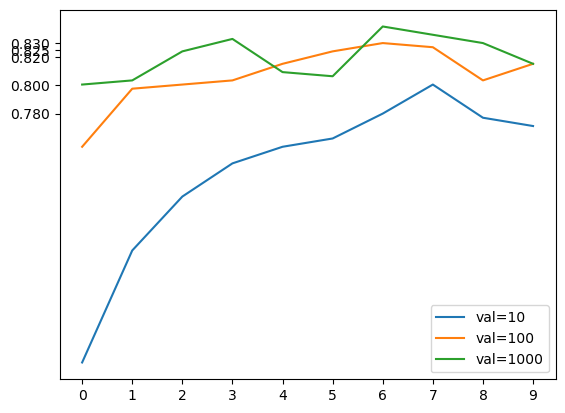

In [45]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78,0.80,0.82,0.825,0.83])
plt.legend()

## Regularization & Dropout

In [47]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False, 
        input_shape= (150,150,3)
    )

    base_model.trainable = False
    
    ########################################################

    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)
    
    ########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy'])
    
    return model

In [49]:
learning_rate = 0.001
size=100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate, size_inner=size,droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()
    

0.0
Epoch 1/30
96/96 [==============================] - 14s 120ms/step - loss: 0.9572 - accuracy: 0.6675 - val_loss: 0.6033 - val_accuracy: 0.8006
Epoch 2/30
96/96 [==============================] - 11s 112ms/step - loss: 0.4942 - accuracy: 0.8299 - val_loss: 0.6637 - val_accuracy: 0.7889
Epoch 3/30
96/96 [==============================] - 11s 113ms/step - loss: 0.3462 - accuracy: 0.8882 - val_loss: 0.5184 - val_accuracy: 0.8358
Epoch 4/30
96/96 [==============================] - 11s 112ms/step - loss: 0.2441 - accuracy: 0.9260 - val_loss: 0.5503 - val_accuracy: 0.8270
Epoch 5/30
96/96 [==============================] - 11s 112ms/step - loss: 0.1721 - accuracy: 0.9534 - val_loss: 0.5743 - val_accuracy: 0.8211
Epoch 6/30
96/96 [==============================] - 11s 112ms/step - loss: 0.1173 - accuracy: 0.9756 - val_loss: 0.5913 - val_accuracy: 0.8270
Epoch 7/30
96/96 [==============================] - 11s 112ms/step - loss: 0.0800 - accuracy: 0.9879 - val_loss: 0.6216 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 10s 102ms/step - loss: 0.0149 - accuracy: 0.9987 - val_loss: 0.8327 - val_accuracy: 0.8270
Epoch 29/30
96/96 [==============================] - 10s 101ms/step - loss: 0.0168 - accuracy: 0.9967 - val_loss: 0.8334 - val_accuracy: 0.8094
Epoch 30/30
96/96 [==============================] - 10s 102ms/step - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.8258 - val_accuracy: 0.8006


0.5
Epoch 1/30
96/96 [==============================] - 12s 110ms/step - loss: 1.3016 - accuracy: 0.5694 - val_loss: 0.7537 - val_accuracy: 0.7830
Epoch 2/30
96/96 [==============================] - 10s 101ms/step - loss: 0.8132 - accuracy: 0.7239 - val_loss: 0.6328 - val_accuracy: 0.7947
Epoch 3/30
96/96 [==============================] - 10s 101ms/step - loss: 0.6729 - accuracy: 0.7705 - val_loss: 0.5957 - val_accuracy: 0.7977
Epoch 4/30
96/96 [==============================] - 10s 101ms/step - loss: 0.5803 - accuracy: 0.8067 - val_loss: 0.5755 - val_accurac

Epoch 25/30
96/96 [==============================] - 10s 101ms/step - loss: 0.6824 - accuracy: 0.7419 - val_loss: 0.5802 - val_accuracy: 0.8240
Epoch 26/30
96/96 [==============================] - 10s 102ms/step - loss: 0.6682 - accuracy: 0.7370 - val_loss: 0.5627 - val_accuracy: 0.8182
Epoch 27/30
96/96 [==============================] - 10s 101ms/step - loss: 0.6574 - accuracy: 0.7415 - val_loss: 0.5680 - val_accuracy: 0.8152
Epoch 28/30
96/96 [==============================] - 10s 102ms/step - loss: 0.6427 - accuracy: 0.7500 - val_loss: 0.5891 - val_accuracy: 0.8152
Epoch 29/30
96/96 [==============================] - 10s 101ms/step - loss: 0.6045 - accuracy: 0.7614 - val_loss: 0.5558 - val_accuracy: 0.8328
Epoch 30/30
96/96 [==============================] - 10s 102ms/step - loss: 0.6232 - accuracy: 0.7549 - val_loss: 0.5555 - val_accuracy: 0.8211




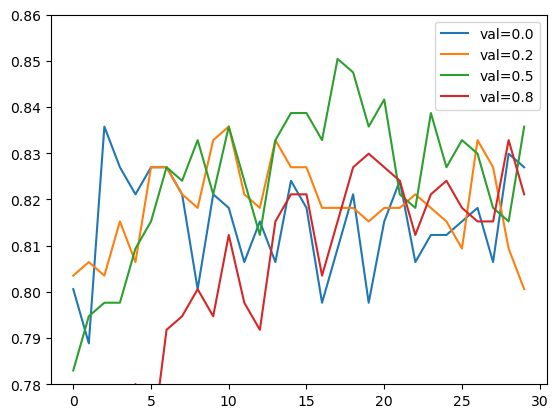

In [50]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
    
plt.ylim(0.78,0.86)
plt.legend()

## Data Augmentation

In [52]:
# setup train generator with prepared preprocessing function
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0, #data augmentation param
    zoom_range=0.1, #data augmentation param
    vertical_flip=True #data augmentation param
)

# generate training data automatically with tensorflow function help
train_ds = train_gen.flow_from_directory(
    '../../clothing-dataset-small/train', # path to train dir
    target_size=(150,150), # intended target size for training image
    batch_size=32 # amount of image per batch
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '../../clothing-dataset-small/validation',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [53]:
learning_rate = 0.001
size=100
droprate = 0.2

scores = {}

model = make_model(
    learning_rate=learning_rate, 
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 26s 244ms/step - loss: 1.3062 - accuracy: 0.5636 - val_loss: 0.7638 - val_accuracy: 0.7566
Epoch 2/50
96/96 [==============================] - 23s 235ms/step - loss: 0.9135 - accuracy: 0.6962 - val_loss: 0.6655 - val_accuracy: 0.7771
Epoch 3/50
96/96 [==============================] - 23s 234ms/step - loss: 0.7785 - accuracy: 0.7405 - val_loss: 0.6295 - val_accuracy: 0.7977
Epoch 4/50
96/96 [==============================] - 23s 235ms/step - loss: 0.6970 - accuracy: 0.7630 - val_loss: 0.6409 - val_accuracy: 0.7859
Epoch 5/50
96/96 [==============================] - 23s 235ms/step - loss: 0.6499 - accuracy: 0.7846 - val_loss: 0.6279 - val_accuracy: 0.7801
Epoch 6/50
96/96 [==============================] - 23s 235ms/step - loss: 0.6066 - accuracy: 0.7868 - val_loss: 0.6167 - val_accuracy: 0.7742
Epoch 7/50
96/96 [==============================] - 23s 234ms/step - loss: 0.5709 - accuracy: 0.8018 - val_loss: 0.5817 - val_accuracy: 0.7889

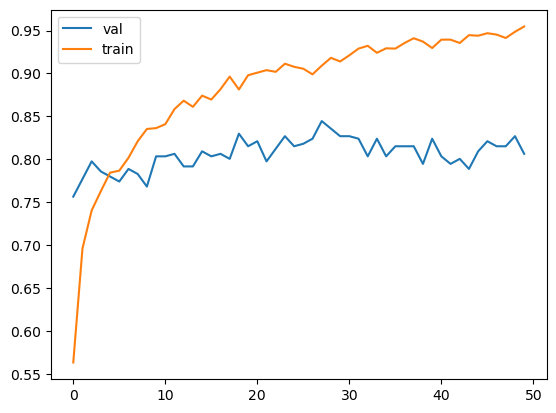

In [54]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Training a Large Model

In [40]:
def make_model(input_size=150 ,learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False, 
        input_shape= (input_size,input_size,3)
    )

    base_model.trainable = False
    
    ########################################################

    inputs = keras.Input(shape=(input_size,input_size,3))

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)
    
    ########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy'])
    
    return model

In [41]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0, 
    zoom_range=0.1, 
    horizontal_flip=True 
)

train_ds = train_gen.flow_from_directory(
    '../../clothing-dataset-small/train',
    target_size=(299,299), 
    batch_size=32 
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '../../clothing-dataset-small/validation',
    target_size=(299,299),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [42]:
checkpoint = keras.callbacks.ModelCheckpoint(
    './saved_model/xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5', #filename template
    save_best_only=True,
    monitor='val_accuracy', #parameter of monitor
    mode='max', # find max val accuracy
)

In [43]:
learning_rate = 0.0005
size=100
droprate = 0.2
input_size = 299

scores = {}

model = make_model(
    input_size = input_size,
    learning_rate=learning_rate, 
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 67s 669ms/step - loss: 1.0212 - accuracy: 0.6816 - val_loss: 0.5397 - val_accuracy: 0.8328
Epoch 2/50
96/96 [==============================] - 64s 663ms/step - loss: 0.5387 - accuracy: 0.8181 - val_loss: 0.4324 - val_accuracy: 0.8680
Epoch 3/50
96/96 [==============================] - 63s 658ms/step - loss: 0.4435 - accuracy: 0.8484 - val_loss: 0.4134 - val_accuracy: 0.8504
Epoch 4/50
96/96 [==============================] - 64s 668ms/step - loss: 0.3883 - accuracy: 0.8651 - val_loss: 0.4072 - val_accuracy: 0.8563
Epoch 5/50
96/96 [==============================] - 64s 666ms/step - loss: 0.3510 - accuracy: 0.8814 - val_loss: 0.3764 - val_accuracy: 0.8680
Epoch 6/50
96/96 [==============================] - 64s 661ms/step - loss: 0.3232 - accuracy: 0.8892 - val_loss: 0.3665 - val_accuracy: 0.8798
Epoch 7/50
96/96 [==============================] - 64s 669ms/step - loss: 0.2962 - accuracy: 0.9003 - val_loss: 0.3563 - val_accuracy: 0.8739

KeyboardInterrupt: 

## Using the model

In [44]:
import tensorflow as tf
from tensorflow import keras

In [74]:
model = keras.models.load_model('./saved_model/xception_v4_1_24_0.889.h5')

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

In [76]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '../../clothing-dataset-small/test',
    target_size=(299,299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [77]:
model.evaluate(test_ds)

12/12 [==============================] - 3s 201ms/step - loss: 0.2704 - accuracy: 0.9086


[0.2704389989376068, 0.9086021780967712]

In [92]:
path = '../../clothing-dataset-small/test/pants/25e7d73a-cd9a-4c2b-ab36-594ee2827745.jpg'

In [100]:
# load image to cherrypick test
img = load_img(path, target_size=(299,299))

In [101]:
import numpy as np

In [102]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [103]:
X = preprocess_input(X)

In [104]:
#get logit output without softmax/any other activation function
pred = model.predict(X)

1/1 [==============================] - 0s 25ms/step


In [105]:
# set classes list in order
classes =['dress',
          'hat',
          'longsleeve',
          'outwear',
          'pants',
          'shirt',
          'shoes',
          'shorts',
          'skirt',
          't-shirt'
         ]

In [107]:
# zip class name with their logit score in order to help clearly see what is model prediction on the test img
# higher score (positive value), more the its likely as test image label
# from the output we can see that 'pants' class get highest score, and we can conclude the model correctly clasify the test image
dict(zip(classes, pred[0]))

{'dress': -2.8997874,
 'hat': -7.19866,
 'longsleeve': -2.4041984,
 'outwear': -1.8493551,
 'pants': 8.738834,
 'shirt': -3.863894,
 'shoes': -3.9204044,
 'shorts': 5.35476,
 'skirt': -0.93334484,
 't-shirt': -3.5834763}